### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.facecolor'] = 'white'
sns.set(style='whitegrid')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
import pylab

from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

from sklearn.feature_selection import RFE

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Importing Skerrorlearner
from skerrorlearner.learn_error import LearnClassificationError
from skerrorlearner.learn_error import ProductionPredictionGeneration

import warnings
warnings.filterwarnings('ignore')

### Loading the Data

https://archive.ics.uci.edu/ml/datasets/Adult

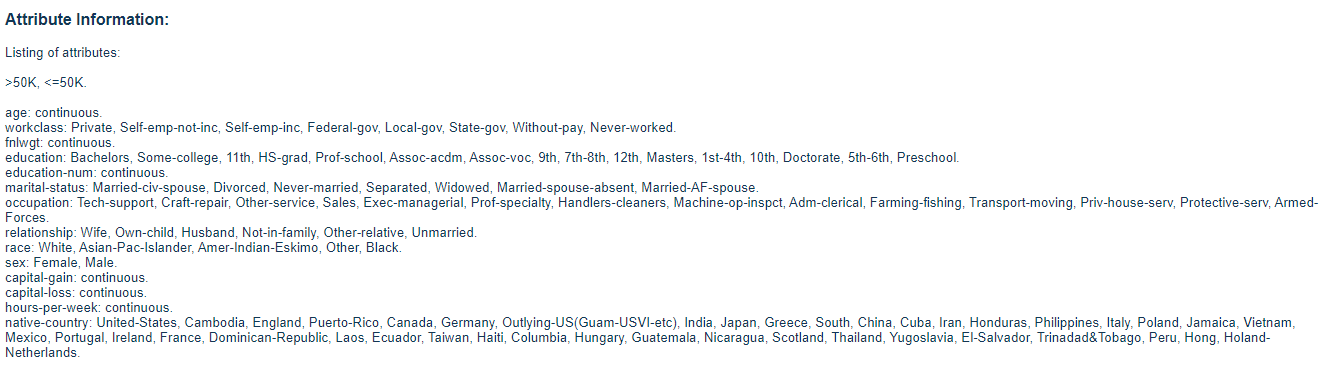

In [2]:
df=pd.read_csv('./adult.csv')

In [3]:
df.shape

(48842, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Applying required preprocessing

In [5]:
# >50K = 1, <=50K = 0
df.loc[df['income']=='<=50K','income']=0
df.loc[df['income']!=0,'income']=1

df.replace(to_replace='?',value='Not Known',inplace=True)

### Applying a Train-Test Split

In [6]:
# All the required Exporatory Data Analysis and Feature Engineering is skipped as this notebook is for the demo of Skerrorlearner Library

tr=df.loc[:34189]
va=df.loc[34190:41515]
ts=df.loc[41516:]

print(tr.shape)
print(va.shape)
print(ts.shape)

(34190, 15)
(7326, 15)
(7326, 15)


In [7]:
# Ratio Based Features
# workclass, education, marital-status, occupation, relationship, race, gender, native-country

wc=tr.groupby(['workclass'])['income'].agg(['sum','count']).reset_index()
wc['workclass_encoded']=wc['sum']/wc['count']
tr=tr.merge(wc[['workclass','workclass_encoded']],on=['workclass'],how='left')
va=va.merge(wc[['workclass','workclass_encoded']],on=['workclass'],how='left')
ts=ts.merge(wc[['workclass','workclass_encoded']],on=['workclass'],how='left')

ee=tr.groupby(['education'])['income'].agg(['sum','count']).reset_index()
ee['education_encoded']=ee['sum']/ee['count']
tr=tr.merge(ee[['education','education_encoded']],on=['education'],how='left')
va=va.merge(ee[['education','education_encoded']],on=['education'],how='left')
ts=ts.merge(ee[['education','education_encoded']],on=['education'],how='left')

ms=tr.groupby(['marital-status'])['income'].agg(['sum','count']).reset_index()
ms['marital_status_encoded']=ms['sum']/ms['count']
tr=tr.merge(ms[['marital-status','marital_status_encoded']],on=['marital-status'],how='left')
va=va.merge(ms[['marital-status','marital_status_encoded']],on=['marital-status'],how='left')
ts=ts.merge(ms[['marital-status','marital_status_encoded']],on=['marital-status'],how='left')

oc=tr.groupby(['occupation'])['income'].agg(['sum','count']).reset_index()
oc['occupation_encoded']=oc['sum']/oc['count']
tr=tr.merge(oc[['occupation','occupation_encoded']],on=['occupation'],how='left')
va=va.merge(oc[['occupation','occupation_encoded']],on=['occupation'],how='left')
ts=ts.merge(oc[['occupation','occupation_encoded']],on=['occupation'],how='left')

rs=tr.groupby(['relationship'])['income'].agg(['sum','count']).reset_index()
rs['relationship_encoded']=rs['sum']/rs['count']
tr=tr.merge(rs[['relationship','relationship_encoded']],on=['relationship'],how='left')
va=va.merge(rs[['relationship','relationship_encoded']],on=['relationship'],how='left')
ts=ts.merge(rs[['relationship','relationship_encoded']],on=['relationship'],how='left')

rc=tr.groupby(['race'])['income'].agg(['sum','count']).reset_index()
rc['race_encoded']=rc['sum']/rc['count']
tr=tr.merge(rc[['race','race_encoded']],on=['race'],how='left')
va=va.merge(rc[['race','race_encoded']],on=['race'],how='left')
ts=ts.merge(rc[['race','race_encoded']],on=['race'],how='left')

ge=tr.groupby(['gender'])['income'].agg(['sum','count']).reset_index()
ge['gender_encoded']=ge['sum']/ge['count']
tr=tr.merge(ge[['gender','gender_encoded']],on=['gender'],how='left')
va=va.merge(ge[['gender','gender_encoded']],on=['gender'],how='left')
ts=ts.merge(ge[['gender','gender_encoded']],on=['gender'],how='left')

nc=tr.groupby(['native-country'])['income'].agg(['sum','count']).reset_index()
nc['native_country_encoded']=nc['sum']/nc['count']
tr=tr.merge(nc[['native-country','native_country_encoded']],on=['native-country'],how='left')
va=va.merge(nc[['native-country','native_country_encoded']],on=['native-country'],how='left')
ts=ts.merge(nc[['native-country','native_country_encoded']],on=['native-country'],how='left')

In [8]:
va['native_country_encoded'].fillna(0,inplace=True)

In [9]:
# feedable features
feat=[
      'age',
      'capital-gain',
      'capital-loss',
      'hours-per-week',
      'workclass_encoded',
      'education_encoded',
      'marital_status_encoded',
      'occupation_encoded',
      'relationship_encoded',
      'race_encoded',
      'gender_encoded',
      'native_country_encoded']

In [10]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(tr[feat],tr['income'])
lr_pred_va=lr.predict(va[feat])
lr_pred_ts=lr.predict(ts[feat])
print("Logistic Regression")
print("Precision - "+str(precision_score(va['income'],lr_pred_va))+" Recall - "+str(recall_score(va['income'],lr_pred_va))+" F1-Score - "+str(f1_score(va['income'],lr_pred_va))+" Accuracy - "+str(accuracy_score(va['income'],lr_pred_va)))
print("Precision - "+str(precision_score(ts['income'],lr_pred_ts))+" Recall - "+str(recall_score(ts['income'],lr_pred_ts))+" F1-Score - "+str(f1_score(ts['income'],lr_pred_ts))+" Accuracy - "+str(accuracy_score(ts['income'],lr_pred_ts)))
print('\n')

# Decision Tree
dc=DecisionTreeClassifier()
dc.fit(tr[feat],tr['income'])
lr_pred_va=dc.predict(va[feat])
lr_pred_ts=dc.predict(ts[feat])
print("Decision Tree")
print("Precision - "+str(precision_score(va['income'],lr_pred_va))+" Recall - "+str(recall_score(va['income'],lr_pred_va))+" F1-Score - "+str(f1_score(va['income'],lr_pred_va))+" Accuracy - "+str(accuracy_score(va['income'],lr_pred_va)))
print("Precision - "+str(precision_score(ts['income'],lr_pred_ts))+" Recall - "+str(recall_score(ts['income'],lr_pred_ts))+" F1-Score - "+str(f1_score(ts['income'],lr_pred_ts))+" Accuracy - "+str(accuracy_score(ts['income'],lr_pred_ts)))
print('\n')

# Random Forest
rf=RandomForestClassifier()
rf.fit(tr[feat],tr['income'])
lr_pred_va=rf.predict(va[feat])
lr_pred_ts=rf.predict(ts[feat])
print("Random Forest")
print("Precision - "+str(precision_score(va['income'],lr_pred_va))+" Recall - "+str(recall_score(va['income'],lr_pred_va))+" F1-Score - "+str(f1_score(va['income'],lr_pred_va))+" Accuracy - "+str(accuracy_score(va['income'],lr_pred_va)))
print("Precision - "+str(precision_score(ts['income'],lr_pred_ts))+" Recall - "+str(recall_score(ts['income'],lr_pred_ts))+" F1-Score - "+str(f1_score(ts['income'],lr_pred_ts))+" Accuracy - "+str(accuracy_score(ts['income'],lr_pred_ts)))
print('\n')

# AdaBoost
ada=AdaBoostClassifier()
ada.fit(tr[feat],tr['income'])
lr_pred_va=ada.predict(va[feat])
lr_pred_ts=ada.predict(ts[feat])
print("AdaBoost")
print("Precision - "+str(precision_score(va['income'],lr_pred_va))+" Recall - "+str(recall_score(va['income'],lr_pred_va))+" F1-Score - "+str(f1_score(va['income'],lr_pred_va))+" Accuracy - "+str(accuracy_score(va['income'],lr_pred_va)))
print("Precision - "+str(precision_score(ts['income'],lr_pred_ts))+" Recall - "+str(recall_score(ts['income'],lr_pred_ts))+" F1-Score - "+str(f1_score(ts['income'],lr_pred_ts))+" Accuracy - "+str(accuracy_score(ts['income'],lr_pred_ts)))
print('\n')

# XGBoost
xgb=XGBClassifier()
xgb.fit(tr[feat],tr['income'])
lr_pred_va=xgb.predict(va[feat])
lr_pred_ts=xgb.predict(ts[feat])
print("XGBoost")
print("Precision - "+str(precision_score(va['income'],lr_pred_va))+" Recall - "+str(recall_score(va['income'],lr_pred_va))+" F1-Score - "+str(f1_score(va['income'],lr_pred_va))+" Accuracy - "+str(accuracy_score(va['income'],lr_pred_va)))
print("Precision - "+str(precision_score(ts['income'],lr_pred_ts))+" Recall - "+str(recall_score(ts['income'],lr_pred_ts))+" F1-Score - "+str(f1_score(ts['income'],lr_pred_ts))+" Accuracy - "+str(accuracy_score(ts['income'],lr_pred_ts)))
print('\n')

# GradientBoost
gbm=GradientBoostingClassifier()
gbm.fit(tr[feat],tr['income'])
lr_pred_va=gbm.predict(va[feat])
lr_pred_ts=gbm.predict(ts[feat])
print("GradientBoost")
print("Precision - "+str(precision_score(va['income'],lr_pred_va))+" Recall - "+str(recall_score(va['income'],lr_pred_va))+" F1-Score - "+str(f1_score(va['income'],lr_pred_va))+" Accuracy - "+str(accuracy_score(va['income'],lr_pred_va)))
print("Precision - "+str(precision_score(ts['income'],lr_pred_ts))+" Recall - "+str(recall_score(ts['income'],lr_pred_ts))+" F1-Score - "+str(f1_score(ts['income'],lr_pred_ts))+" Accuracy - "+str(accuracy_score(ts['income'],lr_pred_ts)))
print('\n')

# LightGBM
lgbm=LGBMClassifier()
lgbm.fit(tr[feat],tr['income'])
lr_pred_va=lgbm.predict(va[feat])
lr_pred_ts=lgbm.predict(ts[feat])
print("LightGBM")
print("Precision - "+str(precision_score(va['income'],lr_pred_va))+" Recall - "+str(recall_score(va['income'],lr_pred_va))+" F1-Score - "+str(f1_score(va['income'],lr_pred_va))+" Accuracy - "+str(accuracy_score(va['income'],lr_pred_va)))
print("Precision - "+str(precision_score(ts['income'],lr_pred_ts))+" Recall - "+str(recall_score(ts['income'],lr_pred_ts))+" F1-Score - "+str(f1_score(ts['income'],lr_pred_ts))+" Accuracy - "+str(accuracy_score(ts['income'],lr_pred_ts)))
print('\n')

# SVC
svc=SVC()
svc.fit(tr[feat],tr['income'])
lr_pred_va=svc.predict(va[feat])
lr_pred_ts=svc.predict(ts[feat])
print("SVC")
print("Precision - "+str(precision_score(va['income'],lr_pred_va))+" Recall - "+str(recall_score(va['income'],lr_pred_va))+" F1-Score - "+str(f1_score(va['income'],lr_pred_va))+" Accuracy - "+str(accuracy_score(va['income'],lr_pred_va)))
print("Precision - "+str(precision_score(ts['income'],lr_pred_ts))+" Recall - "+str(recall_score(ts['income'],lr_pred_ts))+" F1-Score - "+str(f1_score(ts['income'],lr_pred_ts))+" Accuracy - "+str(accuracy_score(ts['income'],lr_pred_ts)))
print('\n')

# GaussianNB
gnb=GaussianNB()
gnb.fit(tr[feat],tr['income'])
lr_pred_va=gnb.predict(va[feat])
lr_pred_ts=gnb.predict(ts[feat])
print("GaussianNB")
print("Precision - "+str(precision_score(va['income'],lr_pred_va))+" Recall - "+str(recall_score(va['income'],lr_pred_va))+" F1-Score - "+str(f1_score(va['income'],lr_pred_va))+" Accuracy - "+str(accuracy_score(va['income'],lr_pred_va)))
print("Precision - "+str(precision_score(ts['income'],lr_pred_ts))+" Recall - "+str(recall_score(ts['income'],lr_pred_ts))+" F1-Score - "+str(f1_score(ts['income'],lr_pred_ts))+" Accuracy - "+str(accuracy_score(ts['income'],lr_pred_ts)))
print('\n')

# KNN
knn=KNeighborsClassifier()
knn.fit(tr[feat],tr['income'])
lr_pred_va=knn.predict(va[feat])
lr_pred_ts=knn.predict(ts[feat])
print("KNN")
print("Precision - "+str(precision_score(va['income'],lr_pred_va))+" Recall - "+str(recall_score(va['income'],lr_pred_va))+" F1-Score - "+str(f1_score(va['income'],lr_pred_va))+" Accuracy - "+str(accuracy_score(va['income'],lr_pred_va)))
print("Precision - "+str(precision_score(ts['income'],lr_pred_ts))+" Recall - "+str(recall_score(ts['income'],lr_pred_ts))+" F1-Score - "+str(f1_score(ts['income'],lr_pred_ts))+" Accuracy - "+str(accuracy_score(ts['income'],lr_pred_ts)))
print('\n')

# Catboost
cat=CatBoostClassifier(silent=True)
cat.fit(tr[feat],tr['income'])
lr_pred_va=cat.predict(va[feat])
lr_pred_ts=cat.predict(ts[feat])
print("Catboost")
print("Precision - "+str(precision_score(va['income'],lr_pred_va))+" Recall - "+str(recall_score(va['income'],lr_pred_va))+" F1-Score - "+str(f1_score(va['income'],lr_pred_va))+" Accuracy - "+str(accuracy_score(va['income'],lr_pred_va)))
print("Precision - "+str(precision_score(ts['income'],lr_pred_ts))+" Recall - "+str(recall_score(ts['income'],lr_pred_ts))+" F1-Score - "+str(f1_score(ts['income'],lr_pred_ts))+" Accuracy - "+str(accuracy_score(ts['income'],lr_pred_ts)))
print('\n')

Logistic Regression
Precision - 0.7472698907956318 Recall - 0.5477415666094911 F1-Score - 0.6321346090399209 Accuracy - 0.8478023478023478
Precision - 0.7377622377622378 Recall - 0.5835176991150443 F1-Score - 0.6516368128474368 Accuracy - 0.846027846027846


Decision Tree
Precision - 0.6403823178016727 Recall - 0.6129216695254431 F1-Score - 0.6263511539585159 Accuracy - 0.8254163254163254
Precision - 0.6393258426966292 Recall - 0.629424778761062 F1-Score - 0.6343366778149387 Accuracy - 0.8209118209118209


Random Forest
Precision - 0.724950884086444 Recall - 0.6329331046312179 F1-Score - 0.6758241758241759 Accuracy - 0.855036855036855
Precision - 0.7391581632653061 Recall - 0.6410398230088495 F1-Score - 0.6866113744075829 Accuracy - 0.8555828555828556


AdaBoost
Precision - 0.782962962962963 Recall - 0.6043453401943968 F1-Score - 0.6821555340432398 Accuracy - 0.8655473655473656
Precision - 0.7860169491525424 Recall - 0.6155973451327433 F1-Score - 0.6904466501240694 Accuracy - 0.8637728

#### The best performing algorithm on the dataset as seen is CatBoost.
* Also, we are not applying any Feature Selection method or any Hyperparameter Tuning methods as this notebook is for the demo of Skerrorlearner Library.

### Testing LearnClassificationError

* This class is for learning error of Current Model for Classification use cases.

In [11]:
train_set = tr.copy()
validation_set = va.copy()
test_set = ts.copy()
current_model_features_list = feat.copy()
output_label = 'income'
current_model = cat
focus_metric = 'accuracy'
current_average = 'binary'
error_average = 'macro'
include_current_model_predictions = True
include_current_model_probabilities = True

In [12]:
# Creating the Error Learning object for Classification use case. You can check docstring for documentation support.

lce=LearnClassificationError(
    train_set,
    validation_set,
    test_set,
    current_model_features_list,
    output_label,
    current_model,
    focus_metric,
    current_average,
    error_average,
    include_current_model_predictions,
    include_current_model_probabilities
)

In [13]:
# This method generates predictions using the current model provided and computes the error of the same.

lce.fit_current_model()

In [14]:
# Optional Step - Building features using predictions from the current_model
# Just applying some basic feature engineering for demo purpose

lce.train['Current Model Probabilities Class 0 Exp'] = lce.train['Current Model Probabilities Class 0']**2
lce.validation['Current Model Probabilities Class 0 Exp'] = lce.validation['Current Model Probabilities Class 0']**2
lce.test['Current Model Probabilities Class 0 Exp'] = lce.test['Current Model Probabilities Class 0']**2

In [15]:
# Error Model feature list in the object before updation
lce.er_model_features_list

['age',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_encoded',
 'education_encoded',
 'marital_status_encoded',
 'occupation_encoded',
 'relationship_encoded',
 'race_encoded',
 'gender_encoded',
 'native_country_encoded',
 'Current Model Predictions',
 'Current Model Probabilities Class 0',
 'Current Model Probabilities Class 1']

In [16]:
updated_er_model_features_list = ['age',
                                 'capital-gain',
                                 'capital-loss',
                                 'hours-per-week',
                                 'workclass_encoded',
                                 'education_encoded',
                                 'marital_status_encoded',
                                 'occupation_encoded',
                                 'relationship_encoded',
                                 'race_encoded',
                                 'gender_encoded',
                                 'native_country_encoded',
                                 'Current Model Predictions',
                                 #'Current Model Probabilities Class 0',
                                 'Current Model Probabilities Class 1',
                                 'Current Model Probabilities Class 0 Exp'
                                 ]

lce.update_er_model_features_list(updated_er_model_features_list)

In [17]:
# Error Model feature list in the object before updation
lce.er_model_features_list

['age',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_encoded',
 'education_encoded',
 'marital_status_encoded',
 'occupation_encoded',
 'relationship_encoded',
 'race_encoded',
 'gender_encoded',
 'native_country_encoded',
 'Current Model Predictions',
 'Current Model Probabilities Class 1',
 'Current Model Probabilities Class 0 Exp']

In [18]:
# This method fits and computes the Error Learning model.

lce.er_fit_and_predict()

[22:13:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [19]:
# Checking the best performing algorithm

lce.error_model_algorithm

'Gradient Boosting'

In [20]:
# Checking the performance dataframe for all the models

lce.algorithm_performance_df

,Trained Model,Error Model Predictions Validation,Error Model Probability Validation,Error Model Predictions Test,Error Model Probability Test,Error Model Validation Precision,Error Model Validation Recall,Error Model Validation F1-Score,Error Model Validation Accuracy,Error Model Validation Confusion Matrix,Error Model Validation Classification Report,Error Model Test Precision,Error Model Test Recall,Error Model Test F1-Score,Error Model Test Accuracy,Error Model Test Confusion Matrix,Error Model Test Classification Report,Final Output Validation Precision,Final Output Validation Recall,Final Output Validation F1-Score,Final Output Validation Accuracy,Final Output Validation Confusion Matrix,Final Output Validation Classification Report,Final Output Test Precision,Final Output Test Recall,Final Output Test F1-Score,Final Output Test Accuracy,Final Output Test Confusion Matrix,Final Output Test Classification Report
Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.9935407187064355, 0.00013270980311326746, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.9729608921939369, 0.0003423350136353478, 0...",0.625666,0.386006,0.407456,0.876194,"[[6339, 32, 41], [263, 22, 0], [571, 0, 58]]",precision recall f1-score ...,0.601458,0.383616,0.401571,0.871826,"[[6318, 41, 39], [271, 31, 0], [588, 0, 38]]",precision recall f1-score ...,0.790345,0.655232,0.716474,0.876194,"[[5273, 304], [603, 1146]]",precision recall f1-score ...,0.791807,0.652102,0.715196,0.871826,"[[5208, 310], [629, 1179]]",precision recall f1-score ...
Logistic Regression,LogisticRegression(),"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.9729992282190892, 0.0042479585888608356, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.9602144187761134, 0.009792582155222202, 0....",0.625119,0.334503,0.31351,0.875375,"[[6412, 0, 0], [284, 1, 0], [629, 0, 0]]",precision recall f1-score ...,0.291109,0.333333,0.310794,0.873328,"[[6398, 0, 0], [302, 0, 0], [626, 0, 0]]",precision recall f1-score ...,0.797721,0.640366,0.710435,0.875375,"[[5293, 284], [629, 1120]]",precision recall f1-score ...,0.796496,0.653761,0.718104,0.873328,"[[5216, 302], [626, 1182]]",precision recall f1-score ...
Ada Boost,"(DecisionTreeClassifier(max_depth=1, random_st...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.5155603340138858, 2.2793014389354947e-16, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.5155603340138858, 2.2793014389354947e-16, ...",0.291746,0.333333,0.311156,0.875239,"[[6412, 0, 0], [285, 0, 0], [629, 0, 0]]",precision recall f1-score ...,0.291109,0.333333,0.310794,0.873328,"[[6398, 0, 0], [302, 0, 0], [626, 0, 0]]",precision recall f1-score ...,0.797153,0.640366,0.710209,0.875239,"[[5292, 285], [629, 1120]]",precision recall f1-score ...,0.796496,0.653761,0.718104,0.873328,"[[5216, 302], [626, 1182]]",precision recall f1-score ...
SVC,SVC(probability=True),"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.8905264486658344, 0.0336345362121894, 0.07...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.8905471346807199, 0.03363295744063027, 0.0...",0.291746,0.333333,0.311156,0.875239,"[[6412, 0, 0], [285, 0, 0], [629, 0, 0]]",precision recall f1-score ...,0.291109,0.333333,0.310794,0.873328,"[[6398, 0, 0], [302, 0, 0], [626, 0, 0]]",precision recall f1-score ...,0.797153,0.640366,0.710209,0.875239,"[[5292, 285], [629, 1120]]",precision recall f1-score ...,0.796496,0.653761,0.718104,0.873328,"[[5216, 302], [626, 1182]]",precision recall f1-score ...
Light GBM,LGBMClassifier(),"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.9889991416003804, 1.7758970311364658e-05, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, ...","[[0.9705400071891461, 1.7040150218080975e-05, ...",0.59184,0.402239,0.430117,0.873601,"[[6292, 55, 65], [257, 28, 0], [549, 0, 80]]",precision recall f1-score ...,0.588922,0.406581,0.435597,0.869915,"[[6263, 55, 80], 

In [21]:
# Sample Error Matrix

lce.error_matrix

,0,1
0,0,1
1,2,0


#### Here, as we see, the best performing algorithm is Support Vector Regressor.

In [22]:
# Let's say you're solving hackathon and you need prediction on the test set provided by the Hackathon Commitee,
# Let the test set be our own test set for the sake of demo purpose.
final_prediction_set = ts.copy()

# Features for predicting using the current model is to be built here. But as features are already built, the fields are pased directly.

# Generating predictions via current_model
final_prediction_set = lce.predict_current_model(final_prediction_set)

# Replicating additional Feature Engineering in final_prediction_set which was done using current_model predictions
final_prediction_set['Current Model Probabilities Class 0 Exp'] = final_prediction_set['Current Model Probabilities Class 0']**2

# Generating predictions via error_model
final_prediction_set = lce.predict_er_model(final_prediction_set)

# Applying Output Transformer
final_prediction_set = lce.output_transformer(final_prediction_set)

In [23]:
# The predictions are stored in the field starting with output_label and ending with "Predictions"

final_prediction_set.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_encoded,education_encoded,marital_status_encoded,occupation_encoded,relationship_encoded,race_encoded,gender_encoded,native_country_encoded,Current Model Predictions,Current Model Probabilities Class 0,Current Model Probabilities Class 1,Current Model Probabilities Class 0 Exp,Error Model Predictions,income Predictions
0,36,Private,31438,HS-grad,9,Divorced,Transport-moving,Unmarried,White,Male,0,0,43,Not Known,0,0.216551,0.159738,0.099093,0.208511,0.057426,0.252552,0.301895,0.266779,0,0.955129,0.044871,0.912271,0.0,0
1,45,Private,168598,12th,8,Married-civ-spouse,Adm-clerical,Wife,Black,Female,3103,0,40,United-States,1,0.216551,0.072093,0.444679,0.134939,0.457955,0.119179,0.108632,0.242170,1,0.151295,0.848705,0.022890,0.0,1
2,32,Private,97306,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,48,United-States,0,0.216551,0.410225,0.045567,0.134939,0.100799,0.252552,0.108632,0.242170,0,0.924340,0.075660,0.854404,0.0,0
3,65,Not Known,106910,11th,7,Divorced,Not Known,Not-in-family,Asian-Pac-Islander,Female,0,0,15,United-States,0,0.090447,0.049883,0.099093,0.090172,0.100799,0.264279,0.108632,0.242170,0,0.994003,0.005997,0.988043,0.0,0
4,18,Self-emp-not-inc,29582,11th,7,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,0,0.277696,0.049883,0.045567,0.225349,0.015607,0.252552,0.301895,0.242170,0,0.996213,0.003787,0.992441,0.0,0


### Testing ProductionPredictionGeneration

* This class helps to generate daily predictions. This library is not only restricted to generate predictions for Hackathons but for live data in live systems as well.

In [24]:
# Instantiate production prediction object
ppg = ProductionPredictionGeneration()

In [25]:
# Let's say you're predicting on live data in Production of some system,
# Let the live data set be our own test set for the sake of demo purpose.
# Here the LearnClassificationError variables are used, but in production these variables will not be available.
# Hence, some of the variables need to be exported, like the er_model_features_list and the error_model.
final_prediction_set = ts.copy()
current_model_features_list = lce.current_model_features_list
current_model = lce.current_model
model_classes = lce.train['income'].unique()

In [26]:
# Features for predicting using the current model is to be built here. But as raw features are used, the fields are pased directly.

# Generating predictions via current_model
final_prediction_set = ppg.classification_predict_current_model_prod(
    final_prediction_set,
    current_model_features_list,
    model_classes,
    current_model
)

# Replicating additional Feature Engineering in final_prediction_set which was done using current_model predictions and probabilities
final_prediction_set['Current Model Probabilities Class 0 Exp'] = final_prediction_set['Current Model Probabilities Class 0']**2

# Here the LearnClassificationError variables are used, but in production these variables will not be available.
# Hence, some of the variables need to be exported, like the er_model_features_list and the error_model.
er_model_features_list = lce.er_model_features_list
error_matrix = lce.error_matrix
error_model = lce.error_model
output_label = 'income'
data_type = 'int64'

# Generating predictions via error_model
final_prediction_set = ppg.classification_predict_error_model_prod(
    final_prediction_set,
    er_model_features_list,
    error_matrix,
    error_model,
    output_label,
    data_type
)

In [27]:
final_prediction_set.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_encoded,education_encoded,marital_status_encoded,occupation_encoded,relationship_encoded,race_encoded,gender_encoded,native_country_encoded,Current Model Predictions,Current Model Probabilities Class 0,Current Model Probabilities Class 1,Current Model Probabilities Class 0 Exp,Error Model Predictions,income Predictions
0,36,Private,31438,HS-grad,9,Divorced,Transport-moving,Unmarried,White,Male,0,0,43,Not Known,0,0.216551,0.159738,0.099093,0.208511,0.057426,0.252552,0.301895,0.266779,0,0.955129,0.044871,0.912271,0.0,0
1,45,Private,168598,12th,8,Married-civ-spouse,Adm-clerical,Wife,Black,Female,3103,0,40,United-States,1,0.216551,0.072093,0.444679,0.134939,0.457955,0.119179,0.108632,0.242170,1,0.151295,0.848705,0.022890,0.0,1
2,32,Private,97306,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,48,United-States,0,0.216551,0.410225,0.045567,0.134939,0.100799,0.252552,0.108632,0.242170,0,0.924340,0.075660,0.854404,0.0,0
3,65,Not Known,106910,11th,7,Divorced,Not Known,Not-in-family,Asian-Pac-Islander,Female,0,0,15,United-States,0,0.090447,0.049883,0.099093,0.090172,0.100799,0.264279,0.108632,0.242170,0,0.994003,0.005997,0.988043,0.0,0
4,18,Self-emp-not-inc,29582,11th,7,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,0,0.277696,0.049883,0.045567,0.225349,0.015607,0.252552,0.301895,0.242170,0,0.996213,0.003787,0.992441,0.0,0
